 Project 1: Data Cars

Table of Contents


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings("ignore")

-Extract data

In [3]:
df = pd.read_excel("C:/Users/Lenovo/Documents/archive/vehicles.xlsx")
df.head() # preview rows

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


-Assess data

In [4]:
print(df.info())  #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15049 entries, 0 to 15048
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            15049 non-null  int64  
 1   url           15049 non-null  object 
 2   region        15049 non-null  object 
 3   region_url    15049 non-null  object 
 4   price         15049 non-null  int64  
 5   year          14905 non-null  float64
 6   manufacturer  14339 non-null  object 
 7   model         14845 non-null  object 
 8   condition     8683 non-null   object 
 9   cylinders     9894 non-null   object 
 10  fuel          14903 non-null  object 
 11  odometer      14964 non-null  float64
 12  title_status  14741 non-null  object 
 13  transmission  14963 non-null  object 
 14  VIN           9908 non-null   object 
 15  drive         10652 non-null  object 
 16  size          4022 non-null   object 
 17  type          12262 non-null  object 
 18  paint_color   11518 non-nu

In [5]:
print(df.head())  # Display the first few rows of the dataset

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [6]:
print(df.isnull().sum())     # missing values

id                  0
url                 0
region              0
region_url          0
price               0
year              144
manufacturer      710
model             204
condition        6366
cylinders        5155
fuel              146
odometer           85
title_status      308
transmission       86
VIN              5141
drive            4397
size            11027
type             2787
paint_color      3531
image_url          27
description        28
county          15049
state               1
lat                84
long               84
posting_date       28
dtype: int64


In [7]:
print(df.describe())     # Summary statistics

                 id         price          year      odometer  county  \
count  1.504900e+04  1.504900e+04  14905.000000  1.496400e+04     0.0   
mean   7.311527e+09  9.292694e+04   2011.565985  1.011644e+05     NaN   
std    6.123926e+06  8.091963e+06     10.273721  3.970026e+05     NaN   
min    7.208550e+09  0.000000e+00   1901.000000  0.000000e+00     NaN   
25%    7.307812e+09  8.900000e+03   2009.000000  2.872775e+04     NaN   
50%    7.313169e+09  1.890000e+04   2014.000000  6.996000e+04     NaN   
75%    7.315892e+09  2.998800e+04   2018.000000  1.230000e+05     NaN   
max    7.316896e+09  9.876543e+08   2022.000000  1.000000e+07     NaN   

                lat          long  
count  14965.000000  14965.000000  
mean      39.971177   -111.493492  
std       11.883187     23.679729  
min      -81.838232   -158.599600  
25%       33.335400   -114.352806  
50%       33.779214   -111.800000  
75%       36.464100    -86.962474  
max       82.390818    173.885502  


In [8]:
print(df.duplicated().sum())      #duplicates values

0


In [9]:
# Check unique values in categorical columns
print(df['manufacturer'].unique())

[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun']


In [10]:
print(df['condition'].unique())

[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']


In [11]:
print(df['fuel'].unique())

[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']


-Cleaning data 

In [12]:
df.drop_duplicates(inplace=True)    # Remove duplicates

-Handle missing values 
-Filling missing values with a placeholder or removing them

In [13]:
df['condition'].fillna('unknown', inplace=True)

In [14]:
df.dropna(subset=['price', 'year', 'manufacturer'], inplace=True)

In [15]:
# Correct data types
df['price'] = df['price'].astype(float)

In [16]:
df['year'] = df['year'].astype(int)

In [17]:
df = df[df['price'] < df['price'].quantile(0.99)]    #Remove outliers

EDA

1-What are the most common car manufacturers in the dataset?

In [18]:
df['manufacturer'].value_counts().head(10)

manufacturer
ford         2458
chevrolet    2135
toyota       1224
jeep          721
nissan        684
honda         625
ram           603
gmc           557
dodge         519
bmw           416
Name: count, dtype: int64

2-What is the average price of vehicles by manufacturer?

In [19]:
df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

manufacturer
tesla              38387.315789
jaguar             31123.970588
alfa-romeo         29721.979167
porsche            28120.571429
ram                27758.656716
rover              27726.170732
audi               27016.013953
gmc                25394.570916
acura              24934.571429
infiniti           23028.763314
bmw                22691.444712
lincoln            22413.060241
jeep               22011.266297
cadillac           21606.526104
volvo              21497.084112
chevrolet          21293.125059
lexus              20937.729730
ford               20866.809194
mercedes-benz      20727.803030
datsun             19625.000000
toyota             18593.960784
subaru             18284.652174
mini               18254.702381
mitsubishi         17775.281250
harley-davidson    17380.833333
dodge              16478.167630
mazda              16259.722892
nissan             15694.440058
volkswagen         14978.913043
kia                14407.858974
buick              13991.65

3-What is the distribution of vehicle conditions?

In [20]:
df['condition'].value_counts()

condition
unknown      5959
good         4487
excellent    2645
like new      839
fair          209
new            38
salvage        16
Name: count, dtype: int64

4-How does price vary by vehicle type?

In [21]:
df.groupby('type')['price'].mean().sort_values(ascending=False)

type
pickup         27836.001085
other          27633.959960
truck          24113.753223
coupe          22699.996169
SUV            20209.614217
van            19162.680412
bus            18507.142857
offroad        17778.204082
hatchback      17606.037182
wagon          16302.071625
sedan          16217.400000
convertible    15988.032710
mini-van       14665.632258
Name: price, dtype: float64

5-What is the relationship between the year of the vehicle and its price?

<Axes: xlabel='year', ylabel='price'>

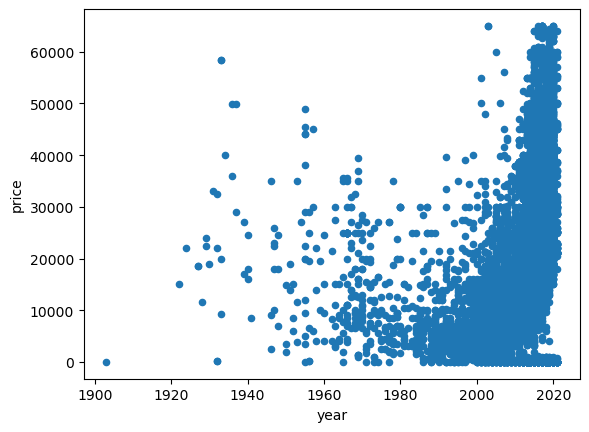

In [22]:
df.plot.scatter(x='year', y='price')

6-Which cities have the highest average vehicle prices?

In [23]:
df.groupby('state')['price'].mean().sort_values(ascending=False).head(10)

state
ak    23129.841024
al    19779.566501
az    18552.129319
Name: price, dtype: float64

7-What are the most common vehicle types listed?

In [24]:
df['type'].value_counts().head(10)

type
sedan          2905
SUV            2701
pickup         1843
truck          1086
other           999
coupe           522
hatchback       511
wagon           363
van             291
convertible     214
Name: count, dtype: int64

8-Which car models are listed most frequently?

In [25]:
df['model'].value_counts().head(10)

model
f-150             308
silverado 1500    213
silverado         142
1500              138
wrangler          113
camry             103
malibu             94
charger            94
mustang            88
grand cherokee     84
Name: count, dtype: int64

9-What is the distribution of mileage across different vehicle types?

In [27]:
df.groupby('type')['odometer'].mean().sort_values(ascending=False)

type
offroad        317839.979592
truck          273572.045412
bus            128099.714286
mini-van       123607.261438
van            121796.869416
SUV             96317.826880
pickup          88105.884825
wagon           79217.773481
sedan           77768.136944
convertible     77250.939252
hatchback       58492.976471
coupe           58228.925287
other           42896.936810
Name: odometer, dtype: float64

10-How does fuel type affect the price of vehicles?

In [28]:
df.groupby('fuel')['price'].mean().sort_values(ascending=False)

fuel
diesel      27150.118984
other       26535.522137
electric    25274.450549
gas         18824.531871
hybrid      18236.556180
Name: price, dtype: float64

11-Are certain vehicle conditions associated with higher prices?

In [29]:
df.groupby('condition')['price'].mean().sort_values(ascending=False)

condition
new          31754.289474
good         22644.908402
like new     20658.287247
unknown      19779.446887
excellent    17171.328922
fair          4254.947368
salvage       3411.875000
Name: price, dtype: float64

12-What is the trend in vehicle prices over different years?

<Axes: xlabel='year'>

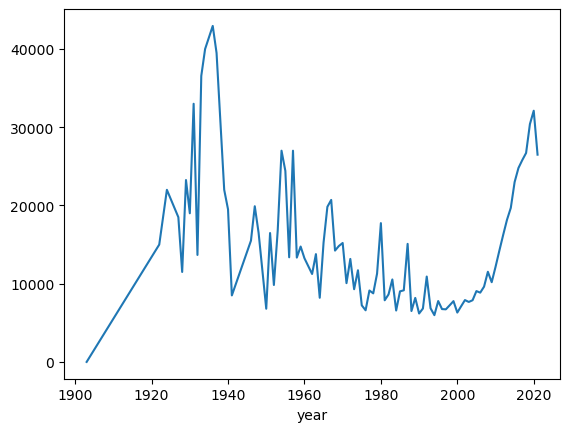

In [30]:
df.groupby('year')['price'].mean().plot()

*Thanks*